In [1]:
import scipy as sc, scipy.io
import numpy as np
import matplotlib.cm as cm
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import sys
sys.path.append('/ocean/imachuca/Canyons/mackenzie_canyon/tools/')
import functions_idealized
import functions_grid
import functions_realistic
import functions_plot

import netCDF4 as nc
from netCDF4 import Dataset

(cmapmc, norm) = functions_plot.Colormap()
from matplotlib.colors import ListedColormap
cmapmc_r = ListedColormap(cmapmc.colors[::-1])

/home/imachuca/anaconda3/envs/gsw/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
#doubling resolution Jan 26
#quadrupling resolution Jun 28
x_final =  258 #483#120 * 4
y_final =  int(0.75 * x_final)#363#int(0.75 * x_final)

extension_m = 90000#108061

smooth_factor = 0.2
max_norm_depth_diff = 0.70834736504

search_x = [-1000000, -1450000, -1750000, -1400000]

In [3]:
this = x_final/y_final

In [4]:
x_wall, y_wall, fluid_depth = functions_idealized.base_measurements()

In [5]:
lon_s_corners_can, lat_s_corners_can = functions_grid.match_domain(x_wall, y_wall, search_x)

In [6]:
x_wall_ext = x_wall + extension_m

In [7]:
lon_s_corners, lat_s_corners = functions_grid.match_domain(x_wall_ext, y_wall, search_x)

In [8]:
lon_g_corners, lat_g_corners = functions_grid.transform_coords(lon_s_corners, lat_s_corners, 'SG')

lonW, latW, lonE, latE = functions_grid.get_southern_points(lon_g_corners, lat_g_corners)

lon_g_grid, lat_g_grid = functions_grid.create_grid(x_final, y_final, lonW, latW, lonE, latE)

lon_s_grid, lat_s_grid = functions_grid.transform_coords(lon_g_grid, lat_g_grid, 'GS')

dx (distance between the corner southern point and its neighbour) [km]: 2.012918374074019
dx2 (distance between the corner northern point and its neighbour) [km]: 2.0092132800497686


In [15]:
def def_regionS(xl=-1750e3, xr=-1000e3, yb=1300e3, yt=2050e3):
    ''' Returns an extract of the complete IBCAO bathymetric
    grid using xl, xr, yb, and yt, which correpond to the left,
    right, bottom, and top boundaries when plotted.
    '''

    ibcao_file = scipy.io.netcdf_file('/ocean/imachuca/Canyons/mackenzie_canyon/bathymetry/data/IBCAO_V3_500m_RR.grd')
    x = ibcao_file.variables['x'][:]
    y = ibcao_file.variables['y'][:]
    z = ibcao_file.variables['z'][:]
    xmin = np.where(x==xl)[0][0]
    xmax = np.where(x==xr)[0][0]
    ymin = np.where(y==yb)[0][0]
    ymax = np.where(y==yt)[0][0]
    x_region = x[xmin:xmax]
    y_region = y[ymin:ymax]
    z_region = z[ymin:ymax, xmin:xmax]
    return x_region, y_region, z_region

x_region, y_region, z_region = functions_plot.def_regionS()

In [16]:
vmin, vmax = z_region.max(), z_region.min()

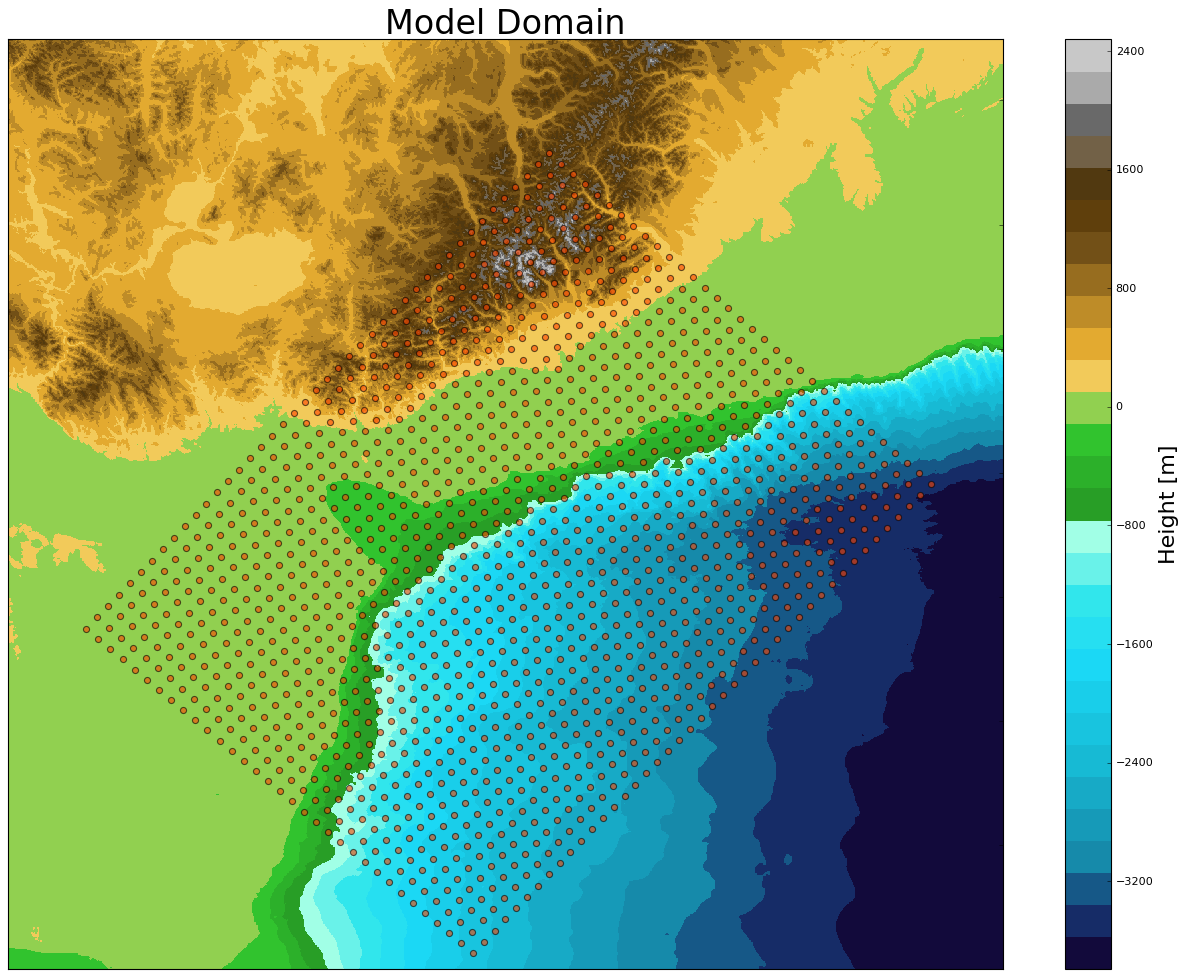

In [11]:
ysize=15
fig, ax = plt.subplots(1, 1, figsize=(ysize*this, ysize)); ax.grid()
p = ax.pcolormesh(x_region, y_region, z_region, cmap=cmapmc)
n=6
ax.scatter(lon_s_grid[::n,::n], lat_s_grid[::n,::n], c='orangered', s=30, alpha=0.6, vmin=vmin, vmax=vmax)
ax.set_xlim([x_region.min(), x_region.max()])
ax.set_ylim([y_region.min(), y_region.max()])
ax.set_title('Model Domain', fontsize=30)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left='off',      # ticks along the bottom edge are off
    labelleft='off')
cbar = fig.colorbar(p, ax=ax)
cbar.ax.set_ylabel('Height [m]', fontsize=20)
plt.savefig('domain.png')

In [17]:
ibcao_file = scipy.io.netcdf_file('/ocean/imachuca/Canyons/mackenzie_canyon/bathymetry/data/IBCAO_V3_500m_RR.grd')
x = ibcao_file.variables['x'][:]
y = ibcao_file.variables['y'][:]
z = ibcao_file.variables['z'][:]

In [26]:
x.min()

(array([[-1102000.],
        [-1342500.],
        [-1698000.],
        [-1457500.]]), array([[ 1739000.],
        [ 1957500.],
        [ 1566500.],
        [ 1348000.]]))

In [10]:
lon_s_corners[0], lon_s_corners[1], lon_s_corners[2], lon_s_corners[3]

(array([-1102000.]),
 array([-1342500.]),
 array([-1698000.]),
 array([-1457500.]))

In [12]:
lat_s_corners[0], lat_s_corners[1], lat_s_corners[2], lat_s_corners[3]

(array([1739000.]), array([1957500.]), array([1566500.]), array([1348000.]))

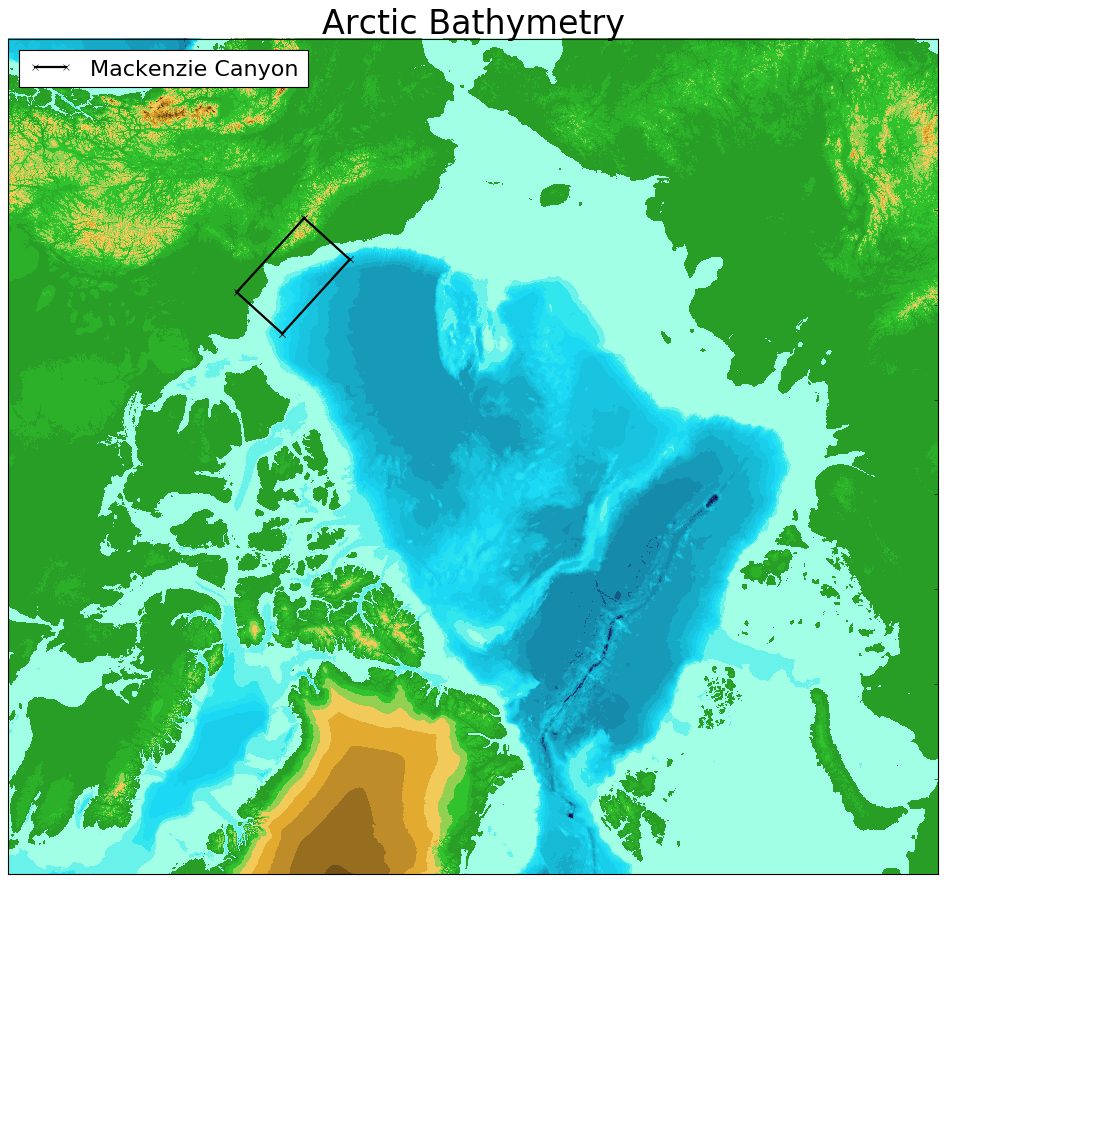

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15)); #ax.grid()
ax.pcolorfast(x, y, z, cmap=cmapmc)
n=20
ax.plot([lon_s_corners[0], lon_s_corners[1]], [lat_s_corners[0], lat_s_corners[1]], c='k', marker='x', lw=2, label='Mackenzie Canyon')
ax.plot([lon_s_corners[1], lon_s_corners[2]], [lat_s_corners[1], lat_s_corners[2]], c='k', marker='x', lw=2)
ax.plot([lon_s_corners[2], lon_s_corners[3]], [lat_s_corners[2], lat_s_corners[3]], c='k', marker='x', lw=2)
ax.plot([lon_s_corners[3], lon_s_corners[0]], [lat_s_corners[3], lat_s_corners[0]], c='k', marker='x', lw=2)
ax.set_xlim([x.min(), 2000000])
ax.set_ylim([-1500000, y.max()])
ax.set_aspect(aspect='equal')
ax.legend(loc = 2, fontsize=20)
#fig.colorbar(p, ax=ax)
ax.set_title('Arctic Bathymetry', fontsize=30)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left='off',      # ticks along the bottom edge are off
    labelleft='off')
plt.savefig('../../OSM_images/bathy_arctic.png')

In [ ]:
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left='off',      # ticks along the bottom edge are off
    labelleft='off')

In [113]:
for i in range(1,50):
    print(i, lon_s_grid.shape[0]/i)

1 258.0
2 129.0
3 86.0
4 64.5
5 51.6
6 43.0
7 36.857142857142854
8 32.25
9 28.666666666666668
10 25.8
11 23.454545454545453
12 21.5
13 19.846153846153847
14 18.428571428571427
15 17.2
16 16.125
17 15.176470588235293
18 14.333333333333334
19 13.578947368421053
20 12.9
21 12.285714285714286
22 11.727272727272727
23 11.217391304347826
24 10.75
25 10.32
26 9.923076923076923
27 9.555555555555555
28 9.214285714285714
29 8.89655172413793
30 8.6
31 8.32258064516129
32 8.0625
33 7.818181818181818
34 7.588235294117647
35 7.371428571428571
36 7.166666666666667
37 6.972972972972973
38 6.7894736842105265
39 6.615384615384615
40 6.45
41 6.2926829268292686
42 6.142857142857143
43 6.0
44 5.863636363636363
45 5.733333333333333
46 5.608695652173913
47 5.48936170212766
48 5.375
49 5.26530612244898


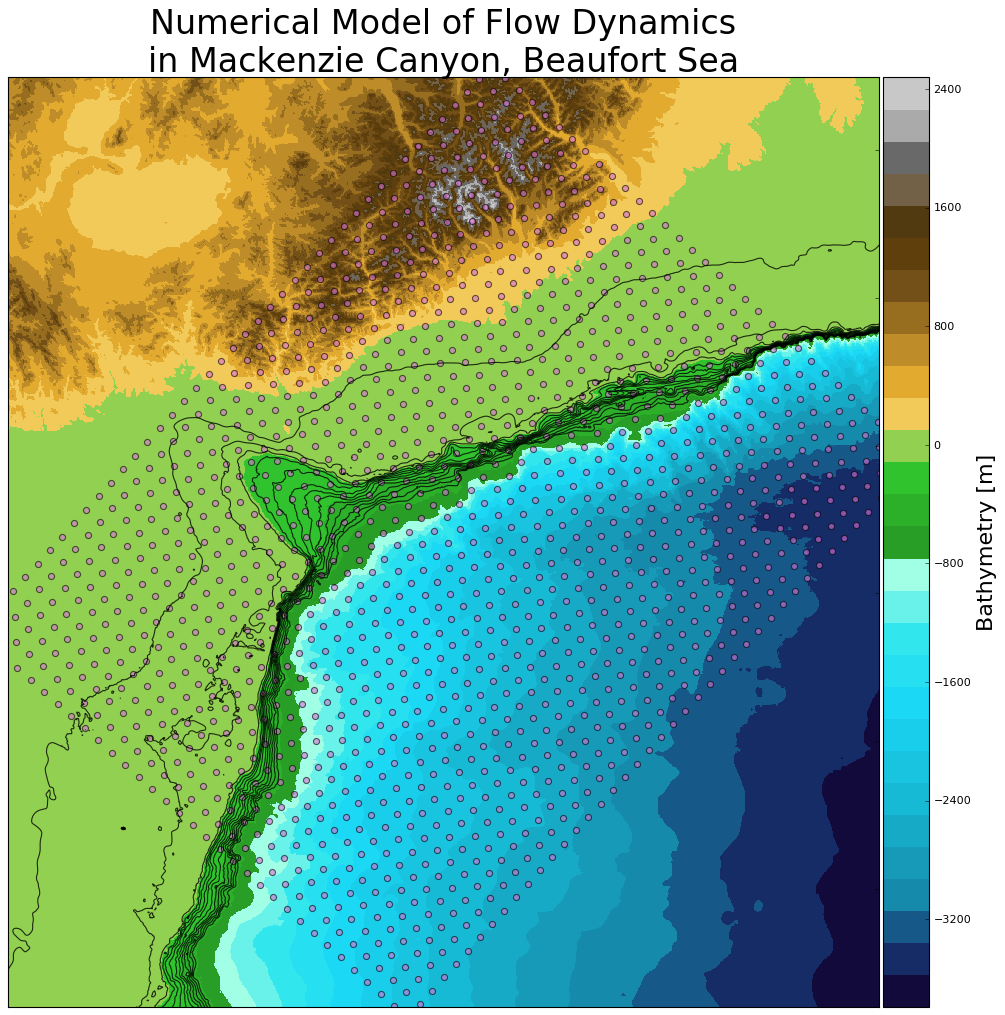

In [90]:
ysize=15
fig, ax = plt.subplots(1, 1, figsize=(ysize*this, ysize)); ax.grid()
p = ax.pcolormesh(x_region, y_region, z_region, cmap=cmapmc)
n=6; ax.scatter(lon_s_grid[::n,::n], lat_s_grid[::n,::n], c='orchid', s=30, alpha=0.6, vmin=vmin, vmax=vmax)
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
ax.contour(x_region, y_region, z_region, levels = np.arange(-500, 0, 40), colors='k', linestyle='--', alpha=0.8)
ax.set_xlim([x_region.min()+80000, x_region.max()-80000])
ax.set_ylim([y_region.min()+20000, y_region.max()-100000])
ax.set_title('Numerical Model of Flow Dynamics\nin Mackenzie Canyon, Beaufort Sea', fontsize=30)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left='off',      # ticks along the bottom edge are off
    labelleft='off')
cbar = fig.colorbar(p, ax=ax, pad=0.003, orientation='vertical')
cbar.ax.set_ylabel('Bathymetry [m]', fontsize=20)
ax.set_aspect('equal')
plt.savefig('domain_cards.png')

In [98]:
x, y, z = functions_plot.def_regionG(xl=-152, xr=-131, yb=66, yt=74)

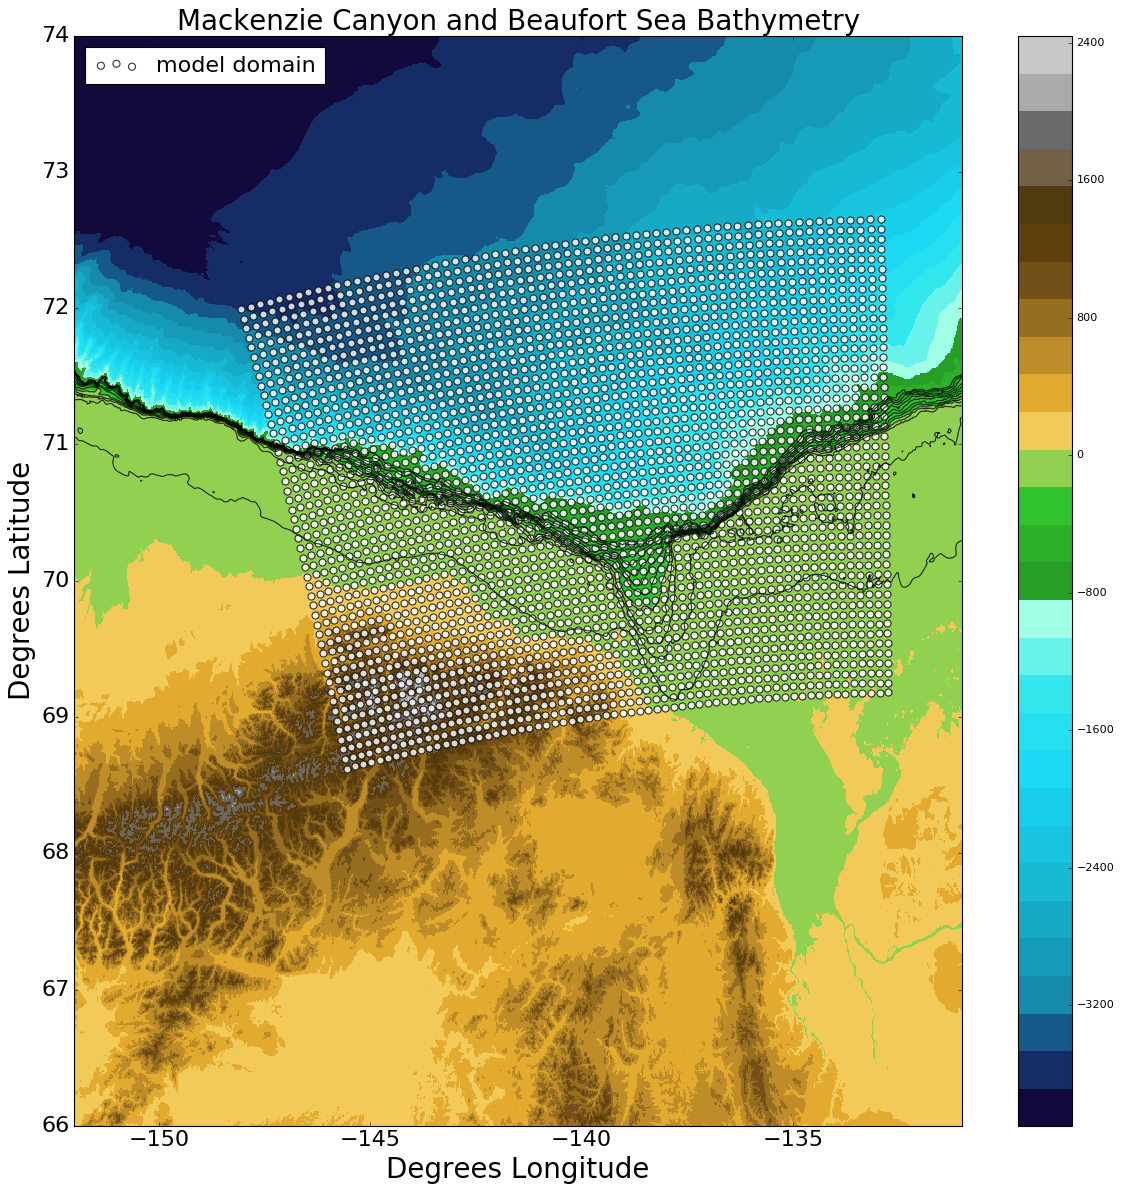

In [100]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15)); ax.grid()
p = ax.pcolormesh(x, y, z, cmap=cmapmc)
CS = ax.contour(x, y, z, levels = np.arange(-500, 0, 40), colors='k', linestyle='-', alpha=0.8)
for line in CS.collections:
    if line.get_linestyle() == [(None, None)]:
        print("Solid Line")
    else:
        line.set_linestyle([(None, None)])
        line.set_color('k')
n=4
ax.scatter(lon_g_grid[::n,::n], lat_g_grid[::n,::n], c='w', s=40, alpha=0.8, label='model domain')
ax.legend(loc=2, fontsize=20)
ax.set_xlim([-152, -131])
ax.set_ylim([66, 74])
ax.set_ylabel('Degrees Latitude', fontsize=25)
ax.set_xlabel('Degrees Longitude', fontsize=25)
ax.set_title('Mackenzie Canyon and Beaufort Sea Bathymetry', fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)
fig.colorbar(p, ax=ax)
fig.tight_layout()
fig.savefig('MackenzieDomain.png', dpi=400)